# 1. 선형회귀 - 당뇨병 수치 맞추기

첫 번째 프로젝트에서는 우리가 오늘 많은 시간을 들여서 직접 실습해 보았던 모델 설계, 손실함수 정의와 기울기 계산을 구현해 보겠습니다.
새로운 데이터로 프로젝트를 진행하지만, 과정은 모두 동일합니다. 함께 진행했던 과정과 코드를 참고하여 충분히 고민한 후 진행해 보세요.

데이터는 sklearn.datasets에 있는 데이터 중 하나인 당뇨병 데이터를 사용하겠습니다.
데이터에 관한 정보를 다음 글에서 살펴보세요. 데이터에 대한 이해는 언제나 첫 번째로 해야하는 필수 과정입니다!

    회귀 (3) - 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀

다음 과정을 차례대로 진행해주세요!

(1) 데이터 가져오기

    sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
    diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [157]:
from sklearn.datasets import load_diabetes

In [158]:
df_X = load_diabetes().data
df_y = load_diabetes().target
display(df_X.shape, df_y.shape)

(442, 10)

(442,)

(442개의 데이터, 10개의 피쳐를 가지고 있음.

In [159]:
load_diabetes().feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

(2) 모델에 입력할 데이터 X 준비하기

    df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [160]:
type(df_X) # 이미 numpy array형태로 되어 있다.

numpy.ndarray

(3) 모델에 예측할 데이터 y 준비하기

    df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [161]:
type(df_y) # 이미 numpy array형태로 되어 있다.

numpy.ndarray

(4) train 데이터와 test 데이터로 분리하기

    X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [162]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, random_state=42) # 다른 요구사항이 없어서 적용하지 않음

In [163]:
display(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(331, 10)

(111, 10)

(331,)

(111,)

(5) 모델 준비하기

    입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
    모델 함수를 구현해주세요.

In [201]:
# 가중치 정의 및 초기화
import numpy as np

# 10개의 피쳐를 가지고 있다. 
W = np.random.rand(10)
b = np.random.rand()

In [202]:
# 모델 함수 구현
def model(X, W, b):
    pred = 0
    for i in range(10):
        pred += X[:, i] * W[i]
    pred += b
    return pred

(6) 손실함수 loss 정의하기

    손실함수를 MSE 함수로 정의해주세요.

In [203]:
def MSE(a, b):
    return ((a - b) ** 2).mean() # 제곱 차이의 평균값

In [204]:
def loss(X, W, b, y):
    pred = model(X, W, b)
    _loss = MSE(pred, y)
    return _loss

(7) 기울기를 구하는 gradient 함수 구현하기

    기울기를 계산하는 gradient 함수를 구현해주세요.

In [205]:
def gradient(X, W, b, y):
    # N : num of datapoint
    N = len(y)
    
    y_pred = model(X, W, b)
    
    # calculate gradient
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    dB = 2 * (y_pred - y).mean()
    
    return dW, dB

(8) 하이퍼 파라미터인 학습률 설정하기

    학습률, learning rate 를 설정해주세요
    만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [206]:
lr_list = [1, 5e-1, 1e-1, 1e-2, 1e-3, 1e-4] # Setting Learning Rates

In [207]:
from collections import defaultdict
import matplotlib.pyplot as plt

losses_dict = defaultdict(list)


(9) 모델 학습하기

    정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
    loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
    입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

--------------------------------
learning_rate : 1, Training
Iteration 100 : Loss 27328.7752
Iteration 200 : Loss 27203.5032
Iteration 300 : Loss 27313.3974
Iteration 400 : Loss 27495.2225
Iteration 500 : Loss 27705.5968
Iteration 600 : Loss 27928.8588
Iteration 700 : Loss 28158.9150
Iteration 800 : Loss 28393.2671
Iteration 900 : Loss 28630.8416
Iteration 1000 : Loss 28871.1589


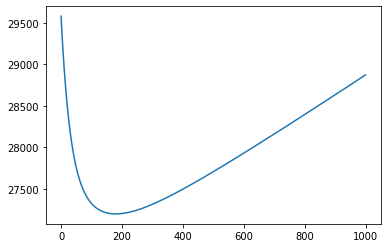

Final Loss : 28871.15892692536
--------------------------------
learning_rate : 0.5, Training
Iteration 100 : Loss 4041.7914
Iteration 200 : Loss 3485.8898
Iteration 300 : Loss 3257.2235
Iteration 400 : Loss 3135.9312
Iteration 500 : Loss 3064.1411
Iteration 600 : Loss 3019.7234
Iteration 700 : Loss 2991.5869
Iteration 800 : Loss 2973.4442
Iteration 900 : Loss 2961.5525
Iteration 1000 : Loss 2953.6310


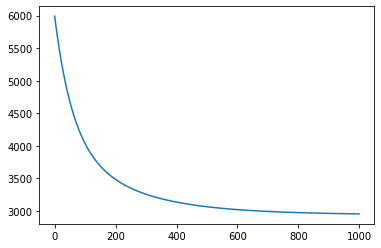

Final Loss : 2953.6309802693895
--------------------------------
learning_rate : 0.1, Training
Iteration 100 : Loss 5373.2129
Iteration 200 : Loss 4889.6123
Iteration 300 : Loss 4528.1739
Iteration 400 : Loss 4254.4392
Iteration 500 : Loss 4044.0838
Iteration 600 : Loss 3879.8922
Iteration 700 : Loss 3749.6405
Iteration 800 : Loss 3644.6140
Iteration 900 : Loss 3558.5687
Iteration 1000 : Loss 3487.0037


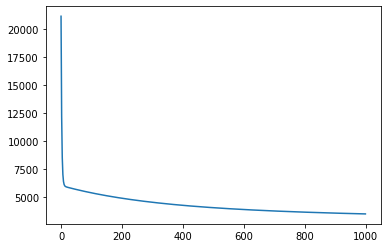

Final Loss : 3487.00369806887
--------------------------------
learning_rate : 0.01, Training
Iteration 100 : Loss 6368.4254
Iteration 200 : Loss 5887.6965
Iteration 300 : Loss 5810.1389
Iteration 400 : Loss 5741.7793
Iteration 500 : Loss 5675.6183
Iteration 600 : Loss 5611.4648
Iteration 700 : Loss 5549.2493
Iteration 800 : Loss 5488.9070
Iteration 900 : Loss 5430.3753
Iteration 1000 : Loss 5373.5939


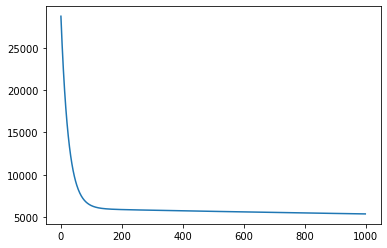

Final Loss : 5373.593895269364
--------------------------------
learning_rate : 0.001, Training
Iteration 100 : Loss 21848.5022
Iteration 200 : Loss 16618.3408
Iteration 300 : Loss 13111.4208
Iteration 400 : Loss 10759.1585
Iteration 500 : Loss 9180.5769
Iteration 600 : Loss 8120.4041
Iteration 700 : Loss 7407.5962
Iteration 800 : Loss 6927.5464
Iteration 900 : Loss 6603.4624
Iteration 1000 : Loss 6383.8903


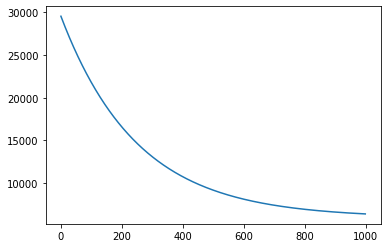

Final Loss : 6383.890301919804
--------------------------------
learning_rate : 0.0001, Training
Iteration 100 : Loss 28723.3528
Iteration 200 : Loss 27832.5533
Iteration 300 : Loss 26976.6572
Iteration 400 : Loss 26154.2957
Iteration 500 : Loss 25364.1539
Iteration 600 : Loss 24604.9681
Iteration 700 : Loss 23875.5245
Iteration 800 : Loss 23174.6567
Iteration 900 : Loss 22501.2441
Iteration 1000 : Loss 21854.2101


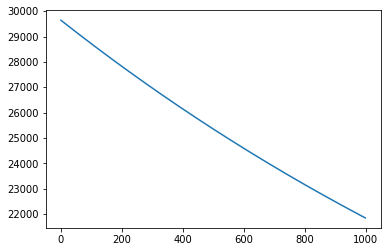

Final Loss : 21854.21010237041


In [218]:
for lr in lr_list: 
    print("--------------------------------")
    print(f"learning_rate : {lr}, Training")
    _W = np.copy(W)
    _b = np.copy(b)
    losses = []
    
    for i in range(1, 1001):
        dW, dB = gradient(train_X, _W, _b, train_y)
        _W -= lr * dW
        _b -= lr * dB
        L = loss(train_X, _W, _b, train_y)

        # Record loss
        losses.append(L)

        # logging per 100 epochs
        if i % 100 == 0:
            print("Iteration %d : Loss %0.4f" % (i,L))
    
    plt.plot(losses)
    plt.show()
    
    losses_dict[lr] = {'W':_W, 'b':_b, 'Final_loss': L}
    print("Final Loss :", L)

lr = 0.5에서 MSE손실함수 값 2953을 달성할 수 있었음 <=3000  
lr 0.1 ~ 0.001의 범위 내에서는 3000에 비교적 근접하는 값을 도출 할 수 있었지만,  
루브릭의 조건에 따라 lr = 0.5 선택

(10) test 데이터에 대한 성능 확인하기

    test 데이터에 대한 성능을 확인해주세요.

In [227]:
# lr = 0.5에 대한 학습된 가중치를 불러옴

sel_weights = losses_dict[0.5]
W, b = sel_weights['W'], sel_weights['b']


In [228]:
W, b

(array([  53.72290081, -196.56436106,  502.54002016,  342.20265182,
         -84.61979868, -116.21339297, -237.11271891,  148.6832392 ,
         357.1578602 ,   95.27059236]),
 array(151.58711))

In [230]:
y_pred = model(test_X, W, b)
mse = loss(test_X, W, b, test_y)
mse # validation mse 또한 3000 이하의 값을 확인할 수 있었다. 

2811.001610251728

(11) 정답 데이터와 예측한 데이터 시각화하기

    x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

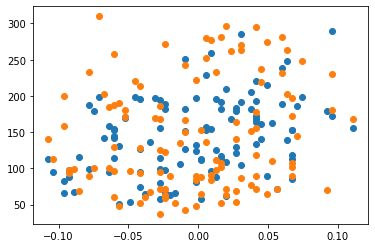

In [234]:
plt.scatter(test_X[:,0], y_pred, cmap='r')
plt.scatter(test_X[:,0], test_y, cmap='b')
plt.show()

# 2. 자전거 타는 사람 몇명 ?

자.. 드디어 오늘의 마지막 프로젝트입니다! 오늘 노드의 제목이기도 한 프로젝트네요 ㅎㅎ
마지막 프로젝트로는 보다 실용적인 데이터셋을 활용할 예정입니다. 바로 그 유명한 캐글(Kaggle) 경진대회에서 제공하는 데이터셋인데요!

데이터셋의 주제는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제입니다.
자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.

이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고, 사이킷런(sklearn)의 LinearRegression 모델을 활용할 것입니다.
이 또한 위에서 진행해봤던 순서 그대로 진행하시면 됩니다!

단계는 다음과 같이 정리가 되어 있습니다. 그러면 오늘의 마지막 프로젝트, 시작해 볼까요!!! 💪🏼

(1) 데이터 가져오기

    터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
    여기에서 데이터를 상세히 확인할 수 있습니다.

In [5]:
import pandas as pd

# df = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train = pd.read_csv('./train.csv') # Local Directory
train.head() # 초기 5개의 값 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.shape

(10886, 12)

(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

    to_datetime 활용 : 링크 참조
    pandas datetime extract year month day 키워드로 검색해 보기

(3) year, month, day, hour, minute, second 데이터 개수 시각화하기

    sns.countplot 활용해서 시각화하기
    subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

(4) X, y 컬럼 선택 및 train/test 데이터 분리

    X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

    count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

(5) LinearRegression 모델 학습

    sklearn의 LinearRegression 모델 불러오기 및 학습하기

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

    학습된 모델에 X_test를 입력해서 예측값 출력하기
    모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
    mse 값과 함께 rmse 값도 계산하기

(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

    x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
    x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기